In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from scipy.stats import zscore

Loading datasets

In [2]:
url='https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv'
df = pd.read_csv(url, error_bad_lines=False)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

this dataset has 614 rows and 13 columns

In [4]:
df.describe

<bound method NDFrame.describe of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849        

In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

The features'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education','Self_Employed,'Property_Area', 'Loan_Status' are object type remaining all are numeric data type

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The features gender,married,dependents,selfemployed,loanamount,loan_amount term,credit_history having null values

Handling null values in categorical column

In [7]:
col_c=['Gender', 'Married', 'Dependents','Self_Employed','Credit_History']
df_mod=df
for i in col_c:
    df_mod[col_c]=df[col_c].fillna(df[col_c].mode().iloc[0])

In [8]:
df_mod.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

null values in categorical column are removed

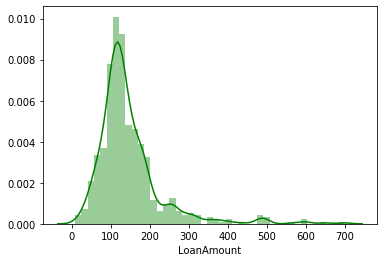

In [9]:
sns.distplot(df['LoanAmount'],kde=True,color='green')

In [10]:
#using mean to remove null values
df_mod['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df_mod['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [11]:
df_mod.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
df['Loan_ID'].value_counts()

LP002443    1
LP001529    1
LP002366    1
LP002223    1
LP001279    1
           ..
LP001872    1
LP002243    1
LP001726    1
LP001333    1
LP001996    1
Name: Loan_ID, Length: 614, dtype: int64

It has unique values which will not create any impact on target column so we can drop this column

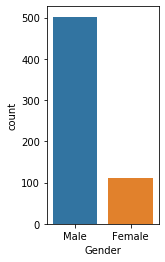

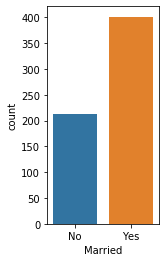

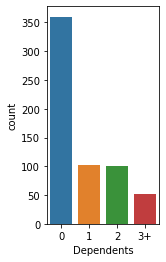

In [13]:
plt.figure(figsize=(2,4))
sns.countplot(df.Gender)

plt.figure(figsize=(2,4))
sns.countplot(df.Married)

plt.figure(figsize=(2,4))
sns.countplot(df.Dependents)

mostly married male who have no dependents have taken loan

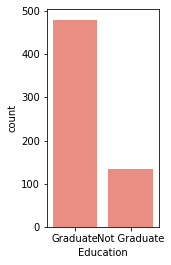

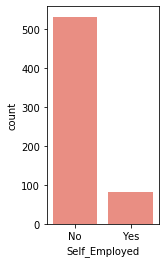

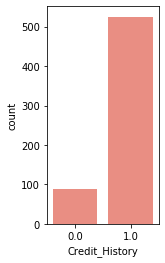

In [14]:
plt.figure(figsize=(2,4))
sns.countplot(df.Education,color="salmon")

plt.figure(figsize=(2,4))
sns.countplot(df.Self_Employed,color="salmon")

plt.figure(figsize=(2,4))
sns.countplot(df.Credit_History,color="salmon")

most of the loan applicants are graduate,not self employed and having credit score 1

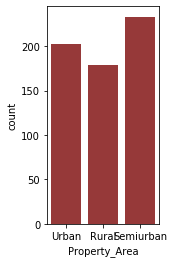

In [15]:
plt.figure(figsize=(2,4))
sns.countplot(df.Property_Area,color="brown")

Majority of people from semi urban are applied for loan

(array([0, 1]), <a list of 2 Text xticklabel objects>)

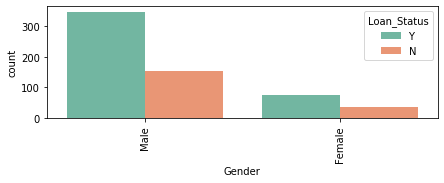

In [16]:
fig=plt.figure(figsize=(7,7))
rows = 3
cols = 1
i=0
color_l=['cyan','grey','salmon','red','grey','pink']
i+=1
plt.subplot(rows,cols,i)
l = list(df_mod['Gender'].unique())
sns.countplot(df_mod['Gender'],palette="Set2",hue=df_mod.Loan_Status)
plt.xticks(rotation=90)

the loan applicants are male who got application sanctioned

(array([0, 1]), <a list of 2 Text xticklabel objects>)

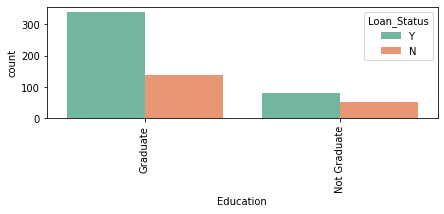

In [17]:
fig=plt.figure(figsize=(7,7))
rows = 3
cols = 1
i=0
color_l=['cyan','grey','salmon','red','grey','pink']
i+=1
plt.subplot(rows,cols,i)
l = list(df_mod['Education'].unique())
sns.countplot(df_mod['Education'],palette="Set2",hue=df_mod.Loan_Status)
plt.xticks(rotation=90)

 most of the loan applicants are graduate.The more graduate application got sanctiond than not graduate

(array([0, 1]), <a list of 2 Text xticklabel objects>)

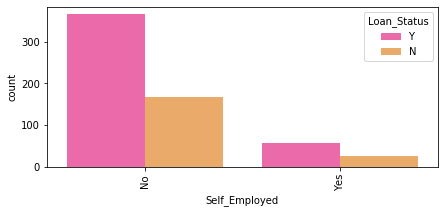

In [18]:
fig=plt.figure(figsize=(7,10))
rows = 3
cols = 1
i=0
color_l=['salmon','red','grey','pink']
i+=1
plt.subplot(rows,cols,i)
l = list(df_mod['Self_Employed'].unique())
sns.countplot(df_mod['Self_Employed'],palette="spring",hue=df_mod.Loan_Status)
plt.xticks(rotation=90)

most of the loan applicants are not self employed.They have less chance of getting loan approval

(array([0, 1]), <a list of 2 Text xticklabel objects>)

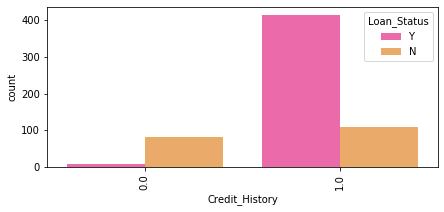

In [19]:
fig=plt.figure(figsize=(7,10))
rows = 3
cols = 1
i=0
color_l=['salmon','red','grey','pink']
i+=1
plt.subplot(rows,cols,i)
l = list(df_mod['Credit_History'].unique())
sns.countplot(df_mod['Credit_History'],palette="spring",hue=df_mod.Loan_Status)
plt.xticks(rotation=90)

most of the loan applicant having credit_history 1.mostly who have credit_history 1 got loan approval

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

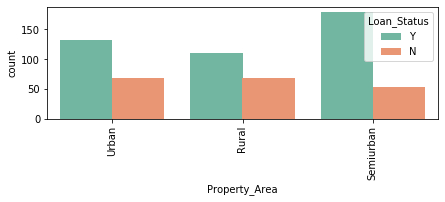

In [20]:
fig=plt.figure(figsize=(7,7))
rows = 3
cols = 1
i=0
color_l=['cyan','grey','salmon','red','grey','pink']
i+=1
plt.subplot(rows,cols,i)
l = list(df_mod['Property_Area'].unique())
sns.countplot(df_mod['Property_Area'],palette="Set2",hue=df_mod.Loan_Status)
plt.xticks(rotation=90)

most of the loan applicants are from semi urban.mostly applicants from semi urban got loan approval

EDA Conclusion

Loan got approved for applicants who falls in below category male,married who have no dependents

graduate,self employed who have credit History 1 and from semi urban place

In [21]:
cols=['ApplicantIncome','CoapplicantIncome','LoanAmount',
       'Loan_Amount_Term']

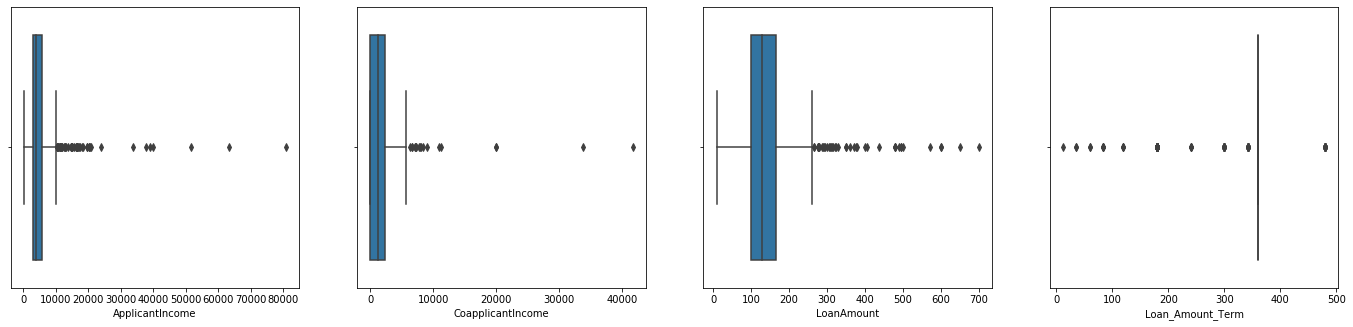

In [22]:
ncol=5
nrows=5
plt.figure(figsize=(30,30))
for i in range(0,4):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(x=cols[i],data=df_mod)

In [23]:
df_clean=df_mod
for i in cols:
    z = np.abs(zscore(df_mod[i]))
print(np.where(z > 3))

(array([ 14,  68,  94, 133, 242, 262, 313, 495, 497, 546, 575, 585],
      dtype=int64),)


In [24]:
df_clean = df_mod[(z<3)]

In [25]:
df_clean.shape

(602, 13)

In [26]:
((614-602)/614)*100

1.9543973941368076

2% data are loss so its acceptable

In [27]:
df_clean.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [28]:
data_clean1=df_clean
col_encod=['Gender', 'Married','Education', 'Dependents','Self_Employed','Property_Area','Loan_Status']

In [29]:
from sklearn import preprocessing 
for col in col_encod:
    label = preprocessing.LabelEncoder()
    data_clean1[col]= label.fit_transform(df_clean[col])

In [30]:
data_clean1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


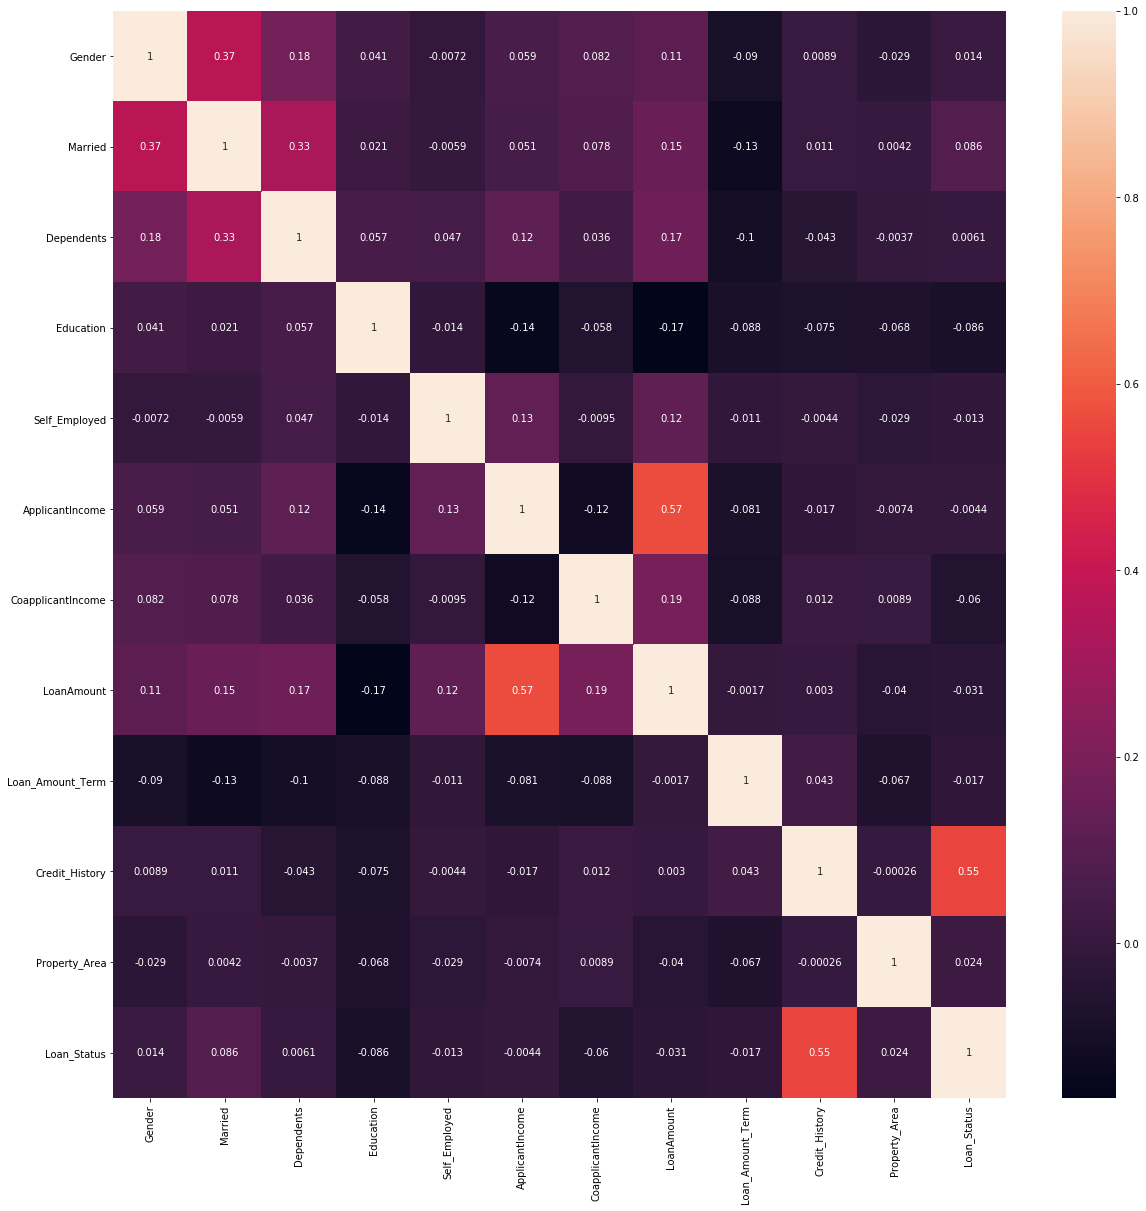

In [31]:
correlation=data_clean1.corr(method='pearson')
plt.figure(figsize=(20,20))
sns.heatmap(correlation,annot=True)

loan_status is higly corelated with credit history

CLASS IMBALANCE

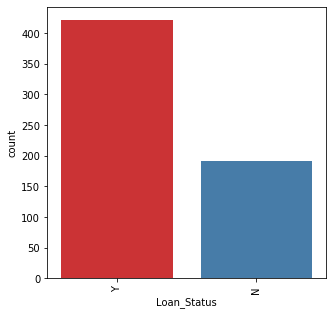

In [32]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['Loan_Status'],data=df,palette="Set1")
plt.xticks(rotation=90)
plt.grid=True
plt.show()

In [33]:
#Over Sampling the data using SMOTE
from imblearn.over_sampling import SMOTE
os=SMOTE()

In [34]:
colu=['Loan_Status','Loan_ID']
x1=data_clean1.drop(colu,axis=1)
y1=data_clean1['Loan_Status']

In [35]:
x1,y1=os.fit_resample(x1,y1)

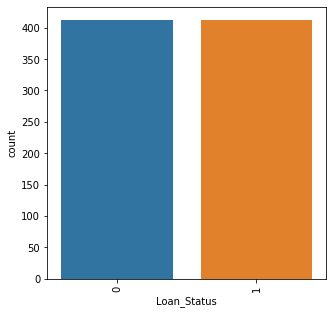

In [36]:
plt.figure(figsize=(5,5))
sns.countplot(x=y1)
plt.xticks(rotation=90)
plt.show()

target column class is balanced

SCALING

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled = scaler.fit_transform(x1)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn .ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
x=scaled
y=y1

In [39]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

models=[LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),GradientBoostingClassifier(),DecisionTreeClassifier()]
scorelist=[]
acclist=[]

In [40]:
def create_model(model):
    m=model
    m.fit(xtrain,ytrain)
    p=m.predict(xtest)
    score=m.score(xtest,ytest)
    result = confusion_matrix(ytest,p)
    result1 = classification_report(ytest,p)
    result2 = accuracy_score(ytest,p)
    scorelist.append(score)
    acclist.append(result2)
    
    
    print(m,"\n")
    
    print('Accuracy score:',score,"\n")
    print('"Confusion Matrix:\n"',result)
    print('classification_report\n',result1)
    print('Average accuracy_score',result2)
    print('---------------------------------------------------------------------------------------------------------')
for i in models:
    create_model(i)

print('Maximun accuracy Score is shown by',models[acclist.index(max(acclist))],max(acclist))

LogisticRegression() 

Accuracy score: 0.7874396135265701 

"Confusion Matrix:
" [[73 40]
 [ 4 90]]
classification_report
               precision    recall  f1-score   support

           0       0.95      0.65      0.77       113
           1       0.69      0.96      0.80        94

    accuracy                           0.79       207
   macro avg       0.82      0.80      0.79       207
weighted avg       0.83      0.79      0.78       207

Average accuracy_score 0.7874396135265701
---------------------------------------------------------------------------------------------------------
RandomForestClassifier() 

Accuracy score: 0.8405797101449275 

"Confusion Matrix:
" [[89 24]
 [ 9 85]]
classification_report
               precision    recall  f1-score   support

           0       0.91      0.79      0.84       113
           1       0.78      0.90      0.84        94

    accuracy                           0.84       207
   macro avg       0.84      0.85      0.84       207
wei

CROSS VALIDATION

In [41]:
x=scaled
y=y1
scorel=[]

In [42]:
lr=LogisticRegression()
scores=cross_val_score(lr,x,y,cv=5)
scorel.append(scores)
scores

array([0.68674699, 0.72727273, 0.77575758, 0.82424242, 0.83636364])

In [43]:
rf=RandomForestClassifier()
scores=cross_val_score(rf,x,y,cv=5)
scorel.append(scores)
scores

array([0.74096386, 0.78787879, 0.86666667, 0.87878788, 0.90909091])

In [44]:
kn=KNeighborsClassifier()
scores=cross_val_score(kn,x,y,cv=5)
scorel.append(scores)
scores

array([0.6686747 , 0.7030303 , 0.76969697, 0.76969697, 0.75757576])

In [45]:
gb=GradientBoostingClassifier()
scores=cross_val_score(gb,x,y,cv=5)
scorel.append(scores)
scores

array([0.69277108, 0.72121212, 0.84848485, 0.87878788, 0.85454545])

In [46]:
dt=DecisionTreeClassifier()
scores=cross_val_score(dt,x,y,cv=5)
scorel.append(scores)
scores

array([0.65662651, 0.77575758, 0.79393939, 0.84848485, 0.8       ])

DIFFERENCE

In [47]:
models=[LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),GradientBoostingClassifier(),DecisionTreeClassifier()]
for i in range(0,5):
    print(models[i],"difference is",scorel[i]-acclist[i])

LogisticRegression() difference is [-0.10069263 -0.06016689 -0.01168204  0.03680281  0.04892402]
RandomForestClassifier() difference is [-0.09961585 -0.05270092  0.02608696  0.03820817  0.0685112 ]
KNeighborsClassifier() difference is [-0.07528665 -0.04093105  0.02573562  0.02573562  0.0136144 ]
GradientBoostingClassifier() difference is [-0.11882312 -0.09038208  0.03689065  0.06719368  0.04295125]
DecisionTreeClassifier() difference is [-0.16946045 -0.05032938 -0.03214756  0.02239789 -0.02608696]


KNeighborsClassifier() has least difference

Finding best parameter using hyper tuning

In [48]:
from sklearn.model_selection import GridSearchCV,KFold
param_grid = {'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan'],
                'p':[1,2],'leaf_size':list(range(1,20))}

clf = GridSearchCV(KNeighborsClassifier(),param_grid, scoring =accuracy_score)
clf.fit(xtrain, ytrain)
print('Best param:', clf.best_params_)

Best param: {'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}


Modelling using best parameters

In [49]:
x=scaled
y=y1

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.25,random_state=1)

In [51]:
model =KNeighborsClassifier(metric='minkowski', n_neighbors=5,weights='uniform',p=1,leaf_size=1)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7439613526570048

In [52]:
y_pred_1 = model.predict(x_test)

In [53]:
result = confusion_matrix(y_test, y_pred_1)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred_1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred_1)
print("Accuracy:",result2)

Confusion Matrix:
[[72 41]
 [12 82]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.64      0.73       113
           1       0.67      0.87      0.76        94

    accuracy                           0.74       207
   macro avg       0.76      0.75      0.74       207
weighted avg       0.77      0.74      0.74       207

Accuracy: 0.7439613526570048


ROC AUC curve

No Skill: ROC AUC=0.500
model: ROC AUC=0.762


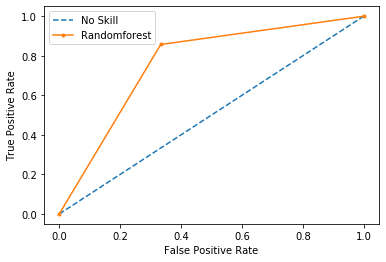

In [54]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.26,random_state=1)
m=KNeighborsClassifier(metric='minkowski', n_neighbors=5,weights='distance',p=1,leaf_size=1)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
ns_probs = [0 for _ in range(len(ytest))]
m_probs = p
ns_auc = roc_auc_score(ytest, ns_probs)
m_auc = roc_auc_score(ytest, m_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('model: ROC AUC=%.3f' % (m_auc))
ns_fpr, ns_tpr,_= roc_curve(ytest, ns_probs)
m_fpr, m_tpr,_=roc_curve(ytest, m_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(m_fpr, m_tpr, marker='.', label='Randomforest')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()


In [55]:
from joblib import dump
dump(model, 'loan.joblib')

['loan.joblib']

In [56]:
from joblib import load
loaded = load('loan.joblib')